# Homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Saving Data

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)
df.to_csv('car_fuel_efficiency.csv', index=False)

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').



## EDA

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [3]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB



- Look at the fuel_efficiency_mpg variable. Does it have a long tail?


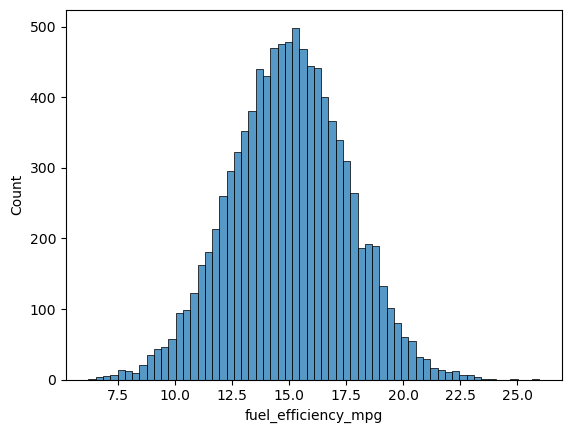

In [5]:
# Distribution of price
sns.histplot(df.fuel_efficiency_mpg)
plt.show()

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [6]:
# View columns with missing values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [7]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

## Preparing the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [8]:
n = len(df)
n_val = n_test = int(0.2 * n)
n_train = n - n_val - n_test

print('n =', n)
print('n_train =', n_train)
print('n_val =', n_val)
print('n_test =', n_test)

n = 9704
n_train = 5824
n_val = 1940
n_test = 1940


In [9]:
# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [10]:
# Split Data
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

display(df_train.head())
display(df_val.head())
display(df_test.head())

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3880,70,87.0,3346.134219,2004,13.085351
3881,280,147.0,4193.817815,2017,9.385060
3882,240,137.0,2471.172629,2010,17.697460
3883,240,127.0,4044.606636,2000,9.298735
3884,280,NaN,3039.297482,2011,14.724394


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1940,110,144.0,2915.183706,2013,15.346002
1941,200,105.0,2850.760653,2008,16.294345
1942,180,125.0,3824.871931,2010,10.643505
1943,260,160.0,2651.797255,2018,16.908809
1944,210,131.0,3003.607759,2018,14.551272


In [11]:
# Target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

display(y_train)
display(y_val)
display(y_test)

array([13.08535112,  9.38505967, 17.69746015, ..., 18.40443466,
       20.50246014, 16.81624056], shape=(5824,))

array([16.64294342, 16.29837715, 18.59182197, ..., 13.96250068,
       16.16462055, 14.90882791], shape=(1940,))

array([15.34600195, 16.29434487, 10.6435054 , ..., 15.31621945,
       15.93774582, 13.73398404], shape=(1940,))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [12]:
def prepare_X_1(df):
    df = df.copy(deep=True)
    df_num = df.fillna(0)
    X = df_num.values
    return X

def prepare_X_2(df):
    df = df.copy(deep=True)
    df_num = df.fillna(df['horsepower'].mean())
    X = df_num.values
    return X

def train_linear_regression(X, y):

    # Add the 1 feature value for the bias term in our feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate XTX (Gram matrix)
    XTX = X.T.dot(X)
    # Calculate the inverse of the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Extract w
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [13]:
# Train the model - Filling NaN with 0
X_train = prepare_X_1(df_train)
w0, w = train_linear_regression(X_train, y_train)
print('X_train shape:', X_train.shape)
print('w0:', w0)
print('w:', w)

X_val = prepare_X_1(df_val)
y_pred = w0 + X_val.dot(w)
rmse_score = rmse(y_val, y_pred)
round(rmse_score, 2)

X_train shape: (5824, 4)
w0: 26.90243551105871
w: [-7.72917007e-07  3.77573901e-03 -5.01275585e-03  1.29370482e-03]


np.float64(0.53)

<Axes: ylabel='Count'>

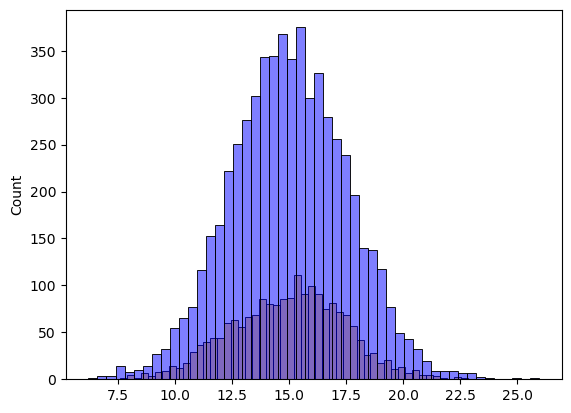

In [14]:
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [15]:
# Train the model - Filling NaN with mean
X_train = prepare_X_2(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_2(df_val)
y_pred = w0 + X_val.dot(w)

rmse_score = rmse(y_val, y_pred)
round(rmse_score, 2)

np.float64(0.47)

<Axes: ylabel='Count'>

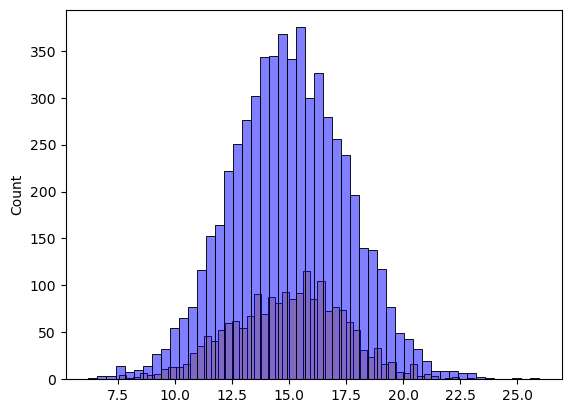

In [16]:
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [17]:
def train_linear_regression_reg(X, y, r=0.001):

    # Add the 1 feature value for the bias term in our feature matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate XTX (Gram matrix)
    XTX = X.T.dot(X)
    
    # Regularization term
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    # Calculate the inverse of the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Extract w
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [18]:
# Tuning the Model
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_1(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_1(df_val)
    y_pred = w0 + X_val.dot(w)

    score = round(rmse(y_val, y_pred),2)
    print('RMSE (%.4f) = %.2f' % (r, score))

RMSE (0.0000) = 0.53
RMSE (0.0100) = 0.53
RMSE (0.1000) = 0.53
RMSE (1.0000) = 0.54
RMSE (5.0000) = 0.54
RMSE (10.0000) = 0.54
RMSE (100.0000) = 0.54


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [19]:
scores = np.zeros(10)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    df_val = df.iloc[:n_val]
    df_test = df.iloc[n_val:n_val + n_test]
    df_train = df.iloc[n_val + n_test:]
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X_1(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_1(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    scores[seed] = (round(rmse_score, 3))
    print('RMSE (%.4f) = %.4f' % (seed, rmse_score))


    

RMSE (0.0000) = 0.5135
RMSE (1.0000) = 0.5227
RMSE (2.0000) = 0.5042
RMSE (3.0000) = 0.5257
RMSE (4.0000) = 0.5304
RMSE (5.0000) = 0.5042
RMSE (6.0000) = 0.5281
RMSE (7.0000) = 0.5132
RMSE (8.0000) = 0.5204
RMSE (9.0000) = 0.5211


In [20]:
scores.std()

np.float64(0.008820997676000156)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5


In [21]:
df = df.sample(frac=1, random_state=9).reset_index(drop=True)

n = len(df)
n_test = int(0.4 * n)
n_train = n - n_test

df_test = df.iloc[: n_test]
df_train = df.iloc[n_test:]
    
y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
    
X_train = prepare_X_1(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X_1(df_test)
y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)
scores[seed] = (round(rmse_score, 3))
print('RMSE (%.4f) = %.4f' % (seed, rmse_score))

RMSE (9.0000) = 0.5240
